In [70]:
import matplotlib.pyplot as plt 
import pandas as pd


# SOURCES


### European Centre for Disease Prevention and Control

> https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

> The ECDC provides daily figures for 204 countries, including Ireland. The Irish figures run from Dec 31, 2019 and record the first case on March 1, 2020 and the first death on March 12. The ECDC figures in this notebook were posted on April 6th ("dataset collected 06.00 - 10.00 CET"). They reflect the situation at 10am on the morning of April 5.


### Irish government

> Irish authorities provide several dashboards:

> https://geohive.maps.arcgis.com/apps/opsdashboard/index.html#/29dc1fec79164c179d18d8e53df82e96 (summary dashboard)

> but no raw data apart from the tables on this webpage:

> https://www.gov.ie/en/publication/ed3cdd-an-analysis-of-the-4916-cases-of-covid-19-in-ireland-as-of-saturday-/

> The Irish government figures used below come from this page and were correct at midnight on April 4.


### Johns Hopkins (& NYT)

> https://covid-19.datasettes.com/covid

> The major dataset from Johns Hopkins (along with the US data from the NYT) can be queried on a datasette interface
using SQL queries. Our world in data explain their preference for the ECDC figures (https://ourworldindata.org/coronavirus-source-data) but there are some extra fields here of use.

# ECDC figures (April 5, morning)

In [2]:

def import_covid_o(date):
    """imports from ONLINE and cleans the latest covid data file from ECDC. Takes argument of 'YYYY-MM-DD'"""
    
    import pandas as pd

    # import from ONLINE and fix column names
    path = f"https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{date}.xlsx"
    global df
    df = pd.read_excel(path)
    df.columns = ['date', 'day', 'month', 'year', 'cases_this_day', 'deaths_this_day', 'country', 'geo_id', 'country_code', 'population']
     
    # cast date col to datetime, build new col in european date format, cast that to datetime
    df.date = pd.to_datetime(df.date)
    df['date_eu'] = df['date'].dt.strftime('%d/%m/%Y')
    df.date_eu = pd.to_datetime(df.date_eu)
    
    # select the top 10 by deaths for the latest date and print date range
    selection = df[df.date_eu == df.date_eu.max()].sort_values('deaths_this_day', ascending = False).head(10)
    print ("Date range is:", df.date_eu.min(), "to", df.date_eu.max()) 

    return df

In [3]:
# import and format the excel file 

import_covid_o('2020-04-05')

Date range is: 2019-12-31 00:00:00 to 2020-12-03 00:00:00


,date,day,month,year,cases_this_day,deaths_this_day,country,geo_id,country_code,population,date_eu
0,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,2020-05-04
1,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,2020-04-04
2,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,2020-03-04
3,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,2020-02-04
4,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0,2020-01-04
5,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0,2020-03-31
6,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0,2020-03-30
7,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0,2020-03-29
8,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0,2020-03-28
9,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0,2020-03-27


In [64]:

def country_filtered_cases(place):
    """takes a country and returns a df of just that country and without the empty days before the first case (bar one)"""

    new_df = df[df.country == place]                       # filter for the country from the main df
    new_df_cases = new_df[~(new_df.cases_this_day == 0)]   # filter for days with cases
    first_case = new_df_cases[-1:].index                   # find the bottom row in that selection to get row of first case
    bottom_row = new_df[-1:].index                         # find the bottom row in the full Ireland df
    nb_rows_todrop = bottom_row - first_case               # how may rows between the first case and the the bottom row?
    to_drop = nb_rows_todrop[0] - 1                        # add one extra row so the selection starts the day before the first case
    
    #global country
    country = new_df[:-to_drop]                            # define final Ireland df as Ireland less all the rows from 2 days before first case
    
    return country

In [68]:
Ireland = country_filtered_cases('Ireland')

# 'country' can be set as a global variable so could be used in this notebook, but this is probably better practice

In [258]:
Ireland

,date,day,month,year,cases_this_day,deaths_this_day,country,geo_id,country_code,population,date_eu
4108,2020-04-05,5,4,2020,331,17,Ireland,IE,IRL,4.85e+06,2020-05-04
4109,2020-04-04,4,4,2020,424,22,Ireland,IE,IRL,4.85e+06,2020-04-04
4110,2020-04-03,3,4,2020,402,13,Ireland,IE,IRL,4.85e+06,2020-03-04
4111,2020-04-02,2,4,2020,212,14,Ireland,IE,IRL,4.85e+06,2020-02-04
4112,2020-04-01,1,4,2020,325,17,Ireland,IE,IRL,4.85e+06,2020-01-04
4113,2020-03-31,31,3,2020,295,8,Ireland,IE,IRL,4.85e+06,2020-03-31
4114,2020-03-30,30,3,2020,200,10,Ireland,IE,IRL,4.85e+06,2020-03-30
4115,2020-03-29,29,3,2020,294,14,Ireland,IE,IRL,4.85e+06,2020-03-29
4116,2020-03-28,28,3,2020,302,3,Ireland,IE,IRL,4.85e+06,2020-03-28
4117,2020-03-27,27,3,2020,255,10,Ireland,IE,IRL,4.85e+06,2020-03-27


In [124]:
def gen_stats(place):
    """takes a country and returns summary figures from the main ECDC dataset"""
    
    country_df = country_filtered_cases(place)
    
    latest_day = str(Ireland.iat[0, 10])[:-9]
    
    cumul_deaths = country_df.deaths_this_day.sum()
    cumul_cases = country_df.cases_this_day.sum()
    
    nb_days = len(country_df) - 1
    date_first_case = str(country_df.iat[(len(country_df)-2), 10])[:-9]
    
    worst_day_d = country_df.deaths_this_day.max()
    worst_day_c = country_df.cases_this_day.max()
    
    date_worst_d = str(country_df[country_df.deaths_this_day == worst_day_d].iat[0,10])[:-9]
    date_worst_c = str(country_df[country_df.cases_this_day == worst_day_c].iat[0,10])[:-9]
    
    print (place.upper())
    print ("Latest day of data:", latest_day)
    print ()
    print ("Total deaths:", cumul_deaths)
    print ("Total cases:", cumul_cases)
    print ()
    print ("Nb of days since first case:", nb_days, "First case:", date_first_case)
    print ()
    print ("Most deaths in a day:", worst_day_d, "on", date_worst_d)
    print ("Most cases in a day:", worst_day_c, "on", date_worst_c)
    print ()
    print ("Average deaths each day (mean) since first case:", (country_df.deaths_this_day.mean()).astype(int))
    print ("Average cases each day (mean) since first case:", (country_df.cases_this_day.mean()).astype(int))

    return 'done'

In [126]:
gen_stats('Ireland')

IRELAND
Latest day of data: 2020-05-04

Total deaths: 137
Total cases: 4604

Nb of days since first case: 34 First case: 2020-01-03

Most deaths in a day: 22 on 2020-04-04
Most cases in a day: 424 on 2020-04-04

Average deaths each day (mean) since first case: 3
Average cases each day (mean) since first case: 131


'done'

In [128]:
Ireland

,date,day,month,year,cases_this_day,deaths_this_day,country,geo_id,country_code,population,date_eu
4108,2020-04-05,5,4,2020,331,17,Ireland,IE,IRL,4853506.0,2020-05-04
4109,2020-04-04,4,4,2020,424,22,Ireland,IE,IRL,4853506.0,2020-04-04
4110,2020-04-03,3,4,2020,402,13,Ireland,IE,IRL,4853506.0,2020-03-04
4111,2020-04-02,2,4,2020,212,14,Ireland,IE,IRL,4853506.0,2020-02-04
4112,2020-04-01,1,4,2020,325,17,Ireland,IE,IRL,4853506.0,2020-01-04
4113,2020-03-31,31,3,2020,295,8,Ireland,IE,IRL,4853506.0,2020-03-31
4114,2020-03-30,30,3,2020,200,10,Ireland,IE,IRL,4853506.0,2020-03-30
4115,2020-03-29,29,3,2020,294,14,Ireland,IE,IRL,4853506.0,2020-03-29
4116,2020-03-28,28,3,2020,302,3,Ireland,IE,IRL,4853506.0,2020-03-28
4117,2020-03-27,27,3,2020,255,10,Ireland,IE,IRL,4853506.0,2020-03-27


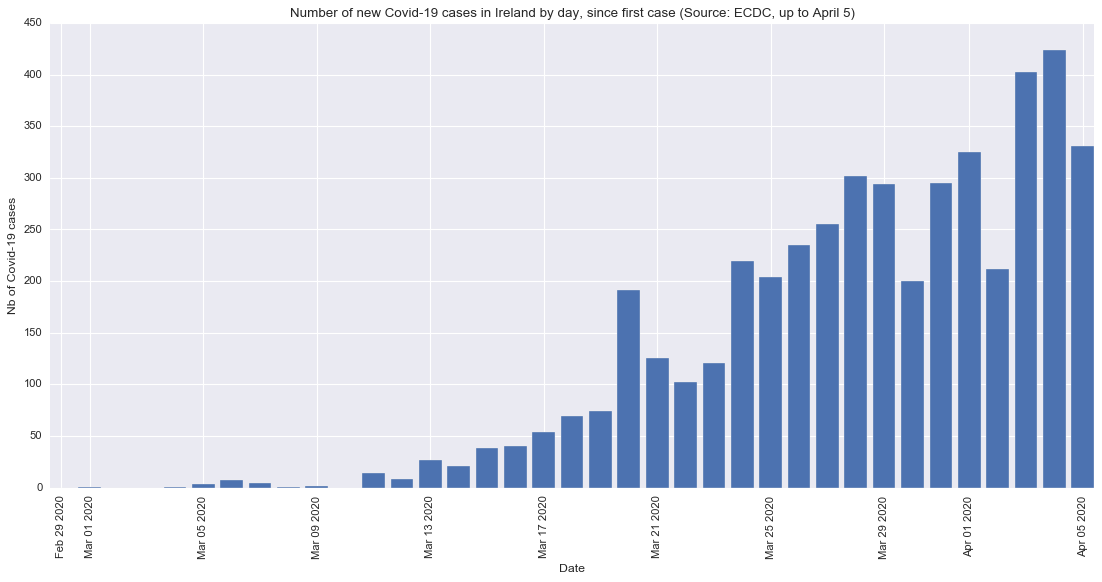

In [260]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (15, 7))  

ax.bar(Ireland.date, Ireland.cases_this_day) # we add the data

ax.set_ylabel("Nb of Covid-19 cases")
ax.set_xlabel("Date")
ax.set_title("Number of new Covid-19 cases in Ireland by day, since first case (Source: ECDC, up to April 5)")

plt.xticks(rotation='vertical')
plt.show()

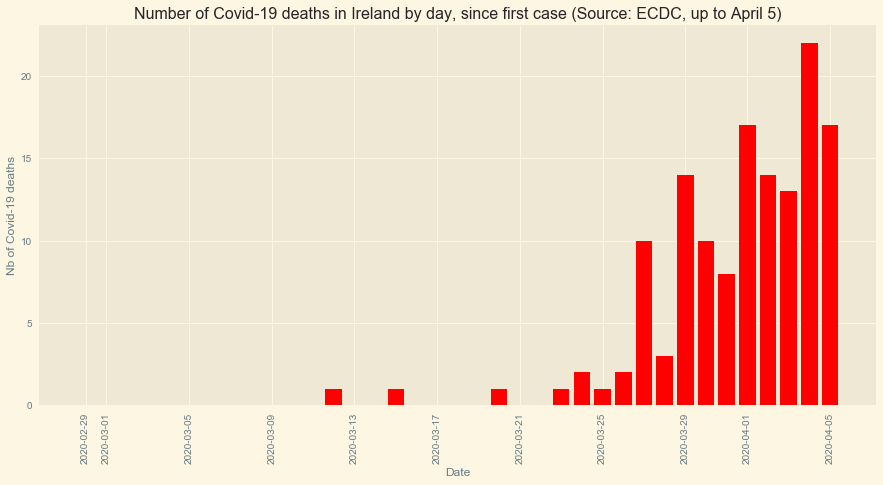

In [145]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize = (15, 7))  

ax.bar(Ireland.date, Ireland.deaths_this_day, color = 'r') # we add the data

ax.set_ylabel("Nb of Covid-19 deaths")
ax.set_xlabel("Date")
ax.set_title("Number of Covid-19 deaths in Ireland by day, since first case (Source: ECDC, up to April 5)")

plt.xticks(rotation='vertical')
plt.show()

# Irish data (April 5 morning)

In [221]:
# limit decimal points on floats

pd.set_option('display.precision', 2)

In [208]:
# import data, add names for columns

path = "/Users/aidanair/Documents/DATA/ALL_DATASETS/COVID/ireland_0404_covid.csv"
counties = pd.read_csv(path, encoding = 'utf-8')


In [211]:
# look at the datatypes

print (counties.info())
counties[:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
county             26 non-null object
cases              26 non-null int64
cases_by_county    26 non-null object
population         26 non-null int64
area_km2           26 non-null int64
pop_density_km2    26 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.3+ KB
None


,county,cases,cases_by_county,population,area_km2,pop_density_km2
0,Carlow,12,0.20%,56932,896,64
1,Cavan,115,2.30%,76176,1931,85


In [213]:
# remove problem character % before casting to numeric

counties.cases_by_county = counties.cases_by_county.str.replace("%", "")
counties.cases_by_county = pd.to_numeric(counties.cases_by_county)

In [214]:
# populate column with a single date

counties['date'] = '2020-04-02'

In [216]:
# fix more data types and rename a column that no longer has its %

counties.date = pd.to_datetime(counties.date)
counties.rename(columns = {'cases_by_county':'%cases_by_county'}, inplace = True)

In [219]:
# add column with cases per 100,000 people

counties['cases_per_100K'] = (counties.cases / counties.population) * 100_000

In [261]:
# build a new df, sorted by highest values

sorted_counties = counties.sort_values(by = 'cases_per_100K', ascending = False)

# calculate mean and median and assign to variables

counties_mean = sorted_counties.cases_per_100K.mean()
counties_median = sorted_counties.cases_per_100K.median()

print(counties_median)
sorted_counties[:2]

65.69231033749992


,county,cases,%cases_by_county,population,area_km2,pop_density_km2,date,cases_per_100K
5,Dublin,2692,54.8,1347359,926,1504,2020-04-02,199.80
1,Cavan,115,2.3,76176,1931,85,2020-04-02,150.97


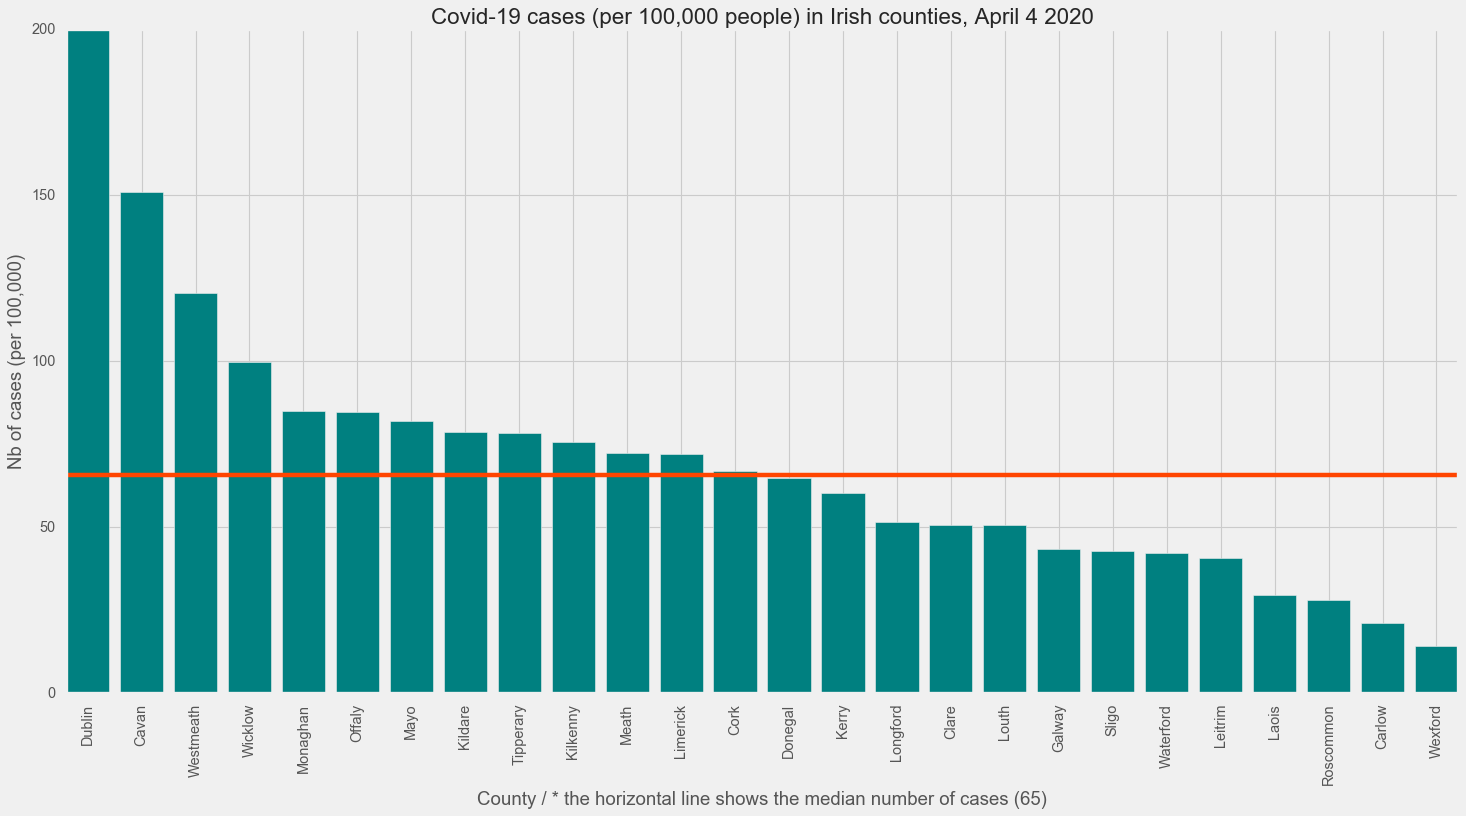

In [256]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (20, 10))              

ax.bar(sorted_counties.county, sorted_counties.cases_per_100K, color = '#008080')

ax.set_xlabel("County / * the horizontal line shows the median number of cases (65)")
ax.set_ylabel("Nb of cases (per 100,000)")
ax.set_title("Covid-19 cases (per 100,000 people) in Irish counties, April 4 2020")

plt.axhline(y = counties_median, xmin=0, xmax=1, color = 'orangered')

plt.xticks(rotation='vertical')
plt.show()

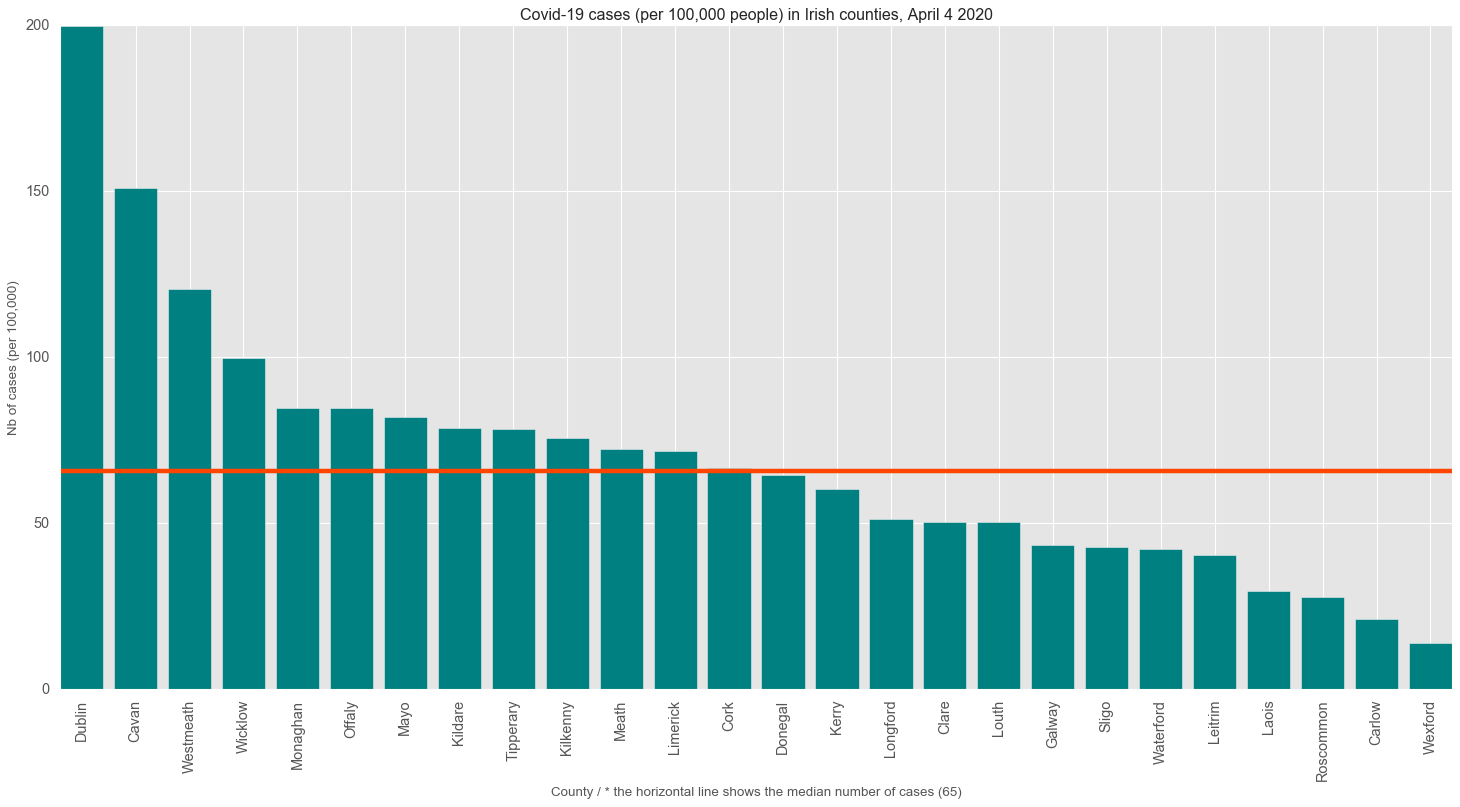

In [257]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20, 10))              

ax.bar(sorted_counties.county, sorted_counties.cases_per_100K, color = '#008080')

ax.set_xlabel("County / * the horizontal line shows the median number of cases (65)")
ax.set_ylabel("Nb of cases (per 100,000)")
ax.set_title("Covid-19 cases (per 100,000 people) in Irish counties, April 4 2020")

plt.axhline(y = counties_median, xmin=0, xmax=1, color = 'orangered')

plt.xticks(rotation='vertical')
plt.show()

# Johns Hopkins (April 5, evening)

In [200]:
def jh_local_import(file):
    """Imports and cleans a local csv from the Johns Hopkins data"""
    # import locally 
    path = f"/Users/aidanair/Documents/DATA/ALL_DATASETS/COVID/{file}"
    global df_jh
    df_jh = pd.read_csv(path, encoding = 'utf-8')
    df_jh.drop(['province_or_state', 'admin2', 'fips', 'latitude', 'longitude', 'combined_key'], axis=1, inplace=True)
    df_jh.day = pd.to_datetime(df_jh.day)

    return df_jh

In [201]:
ireland_jh = jh_local_import('covid_ire_0504_JHd.csv')
ireland_jh

,day,country_or_region,confirmed,deaths,recovered,active,last_update
0,2020-04-05,Ireland,4994,158,25,4811.0,2020-04-05 23:06:26
1,2020-04-04,Ireland,4604,137,25,4442.0,2020-04-04 23:34:04
2,2020-04-03,Ireland,4273,120,5,4148.0,2020-04-03 22:46:20
3,2020-04-02,Ireland,3849,98,5,3746.0,2020-04-02 23:25:14
4,2020-04-01,Ireland,3447,85,5,3357.0,2020-04-01 21:58:34
5,2020-03-31,Ireland,3235,71,5,3159.0,2020-03-31 23:43:43
6,2020-03-30,Ireland,2910,54,5,2851.0,2020-03-30 22:52:33
7,2020-03-29,Ireland,2615,46,5,2564.0,2020-03-29 23:08:13
8,2020-03-28,Ireland,2415,36,5,2374.0,2020-03-28 23:05:25
9,2020-03-27,Ireland,2121,22,5,2094.0,2020-03-27 23:23:03


In [163]:
def jh_online_import():
    """Imports and cleans an online SQL filter of the Johns Hopkins data"""

    # import online 
    path = "https://covid-19.datasettes.com/covid.csv?sql=select+*+from+johns_hopkins_csse_daily_reports+where+country_or_region+%3D+%27Ireland%27+ORDER+BY+day+DESC+limit+60&_size=max"
    
    # global df_jh_o
    df_jh_o = pd.read_csv(path, encoding = 'utf-8')
    df_jh_o.drop(['province_or_state', 'admin2', 'fips', 'latitude', 'longitude', 'combined_key'], axis=1, inplace=True)
        
    return df_jh_o

In [164]:
ireland_jho = jh_online_import()
ireland_jho

,day,country_or_region,confirmed,deaths,recovered,active,last_update
0,2020-04-05,Ireland,4994,158,25,4811.0,2020-04-05 23:06:26
1,2020-04-04,Ireland,4604,137,25,4442.0,2020-04-04 23:34:04
2,2020-04-03,Ireland,4273,120,5,4148.0,2020-04-03 22:46:20
3,2020-04-02,Ireland,3849,98,5,3746.0,2020-04-02 23:25:14
4,2020-04-01,Ireland,3447,85,5,3357.0,2020-04-01 21:58:34
5,2020-03-31,Ireland,3235,71,5,3159.0,2020-03-31 23:43:43
6,2020-03-30,Ireland,2910,54,5,2851.0,2020-03-30 22:52:33
7,2020-03-29,Ireland,2615,46,5,2564.0,2020-03-29 23:08:13
8,2020-03-28,Ireland,2415,36,5,2374.0,2020-03-28 23:05:25
9,2020-03-27,Ireland,2121,22,5,2094.0,2020-03-27 23:23:03


In [203]:
ireland_jho

,day,country_or_region,confirmed,deaths,recovered,active,last_update
0,2020-04-05,Ireland,4994,158,25,4811.0,2020-04-05 23:06:26
1,2020-04-04,Ireland,4604,137,25,4442.0,2020-04-04 23:34:04
2,2020-04-03,Ireland,4273,120,5,4148.0,2020-04-03 22:46:20
3,2020-04-02,Ireland,3849,98,5,3746.0,2020-04-02 23:25:14
4,2020-04-01,Ireland,3447,85,5,3357.0,2020-04-01 21:58:34
5,2020-03-31,Ireland,3235,71,5,3159.0,2020-03-31 23:43:43
6,2020-03-30,Ireland,2910,54,5,2851.0,2020-03-30 22:52:33
7,2020-03-29,Ireland,2615,46,5,2564.0,2020-03-29 23:08:13
8,2020-03-28,Ireland,2415,36,5,2374.0,2020-03-28 23:05:25
9,2020-03-27,Ireland,2121,22,5,2094.0,2020-03-27 23:23:03


In [236]:
ireland_jho.head()

,day,country_or_region,confirmed,deaths,recovered,active,last_update
0,2020-04-05,Ireland,4994,158,25,4811.0,2020-04-05 23:06:26
1,2020-04-04,Ireland,4604,137,25,4442.0,2020-04-04 23:34:04
2,2020-04-03,Ireland,4273,120,5,4148.0,2020-04-03 22:46:20
3,2020-04-02,Ireland,3849,98,5,3746.0,2020-04-02 23:25:14
4,2020-04-01,Ireland,3447,85,5,3357.0,2020-04-01 21:58:34


## SUMMARY - Johns Hopkins

> Total dead of 158 (as against 137 with ECDC) and total cases of 4994 (4604 for ECDC). Active cases are slightly lower
than total cases as they represent total cases - total dead - recovered, which here is 4811. This data is as of late 
evening, although it's not clear on what timezone.